In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


#### Load the crime data from website data.gov.in. https://community.data.gov.in/state-ut-wise-cognizable-ipc-crime-rate-in-india-during-2016/

In [16]:
df_crime=pd.read_csv('F:/myProjects/Coursera_Capstone/analyticsIndia/crimeData.csv')

In [17]:
df_crime=df_crime[['State/UT (Col.2)','Total Cognizable IPC Crimes - R (Col.118)']]
df_crime.rename(columns={'State/UT (Col.2)':'State','Total Cognizable IPC Crimes - R (Col.118)':'NoOfCrime'},inplace=True)
df_crime.head()

,State,NoOfCrime
0,Andhra Pradesh,206.4
1,Arunachal Pradesh,192.0
2,Assam,313.8
3,Bihar,157.4
4,Chhattisgarh,211.7


In [18]:
df_crime.loc[df_crime['State']=='Delhi']

,State,NoOfCrime
34,Delhi,975.0


#### State Wise number of crime in India

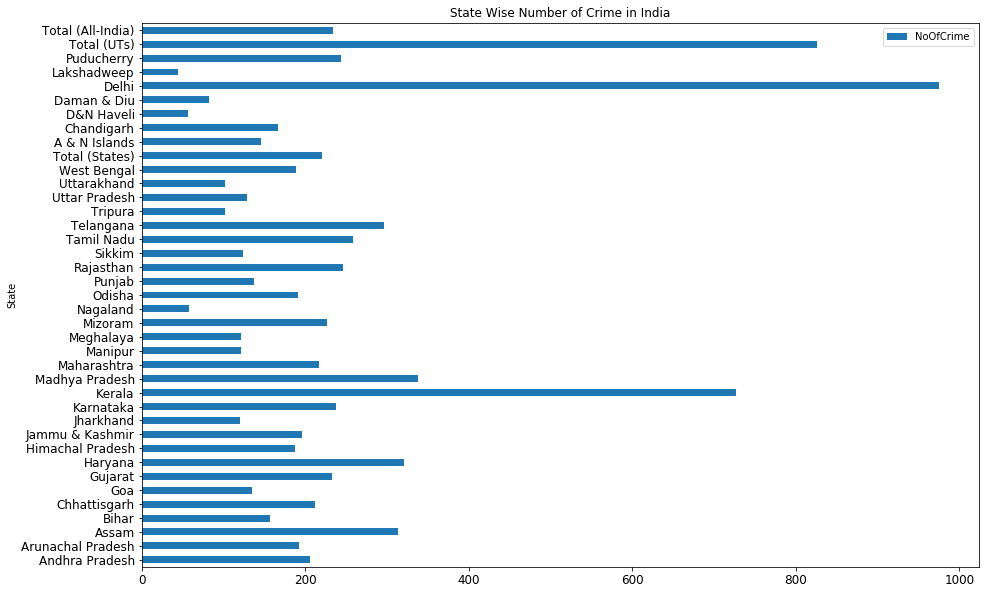

In [20]:
df_crime.plot(kind='barh',x='State',y='NoOfCrime', title ="State Wise Number of Crime in India", figsize=(15, 10),  fontsize=12)

#### Use geopy library to get the latitude and longitude values of India and creating a map of India

In [21]:
# Use geopy library to get the latitude and longitude values of India.
# In order to define an instance of the geocoder, we need to define a user_agent. 
# We will name our agent india_explorer, as shown below.
address = 'India'

geolocator = Nominatim(user_agent="india_explorer")
location_india = geolocator.geocode(address)
latitude_india = location_india.latitude
longitude_india = location_india.longitude
print('The geograpical coordinate of India are {}, {}.'.format(latitude_india, longitude_india))

The geograpical coordinate of India are 22.3511148, 78.6677428.


In [22]:
# create map of India using latitude and longitude values
map_india = folium.Map(location=[latitude_india, longitude_india], zoom_start=5)


map_india

#### Now I am creting a data frame with lattitute and longitude value of all states on India
#### I am using the geopy library for that.


In [24]:
# define the dataframe columns
column_names = ['State', 'NoOfCrime', 'Latitude', 'Longitude'] 

# instantiate the dataframe
df_crime_final = pd.DataFrame(columns=column_names)
df_crime_final

,State,NoOfCrime,Latitude,Longitude


In [25]:
count=0
rowcount=df_crime.shape[0]
print('No of States/UT in Record:',rowcount)
while (count<rowcount):
    address=df_crime.iloc[count,0]
    NoOfCrime=df_crime.iloc[count,1]
    #print('State Name is:',address)
    location = geolocator.geocode(address)
    if (location != None):
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))
        df_crime_final = df_crime_final.append({'State': address,
                                          'NoOfCrime': NoOfCrime,
                                          'Latitude': latitude,
                                          'Longitude': longitude}, ignore_index=True)
    
    count=count+1


df_crime_final.head()

No of States/UT in Record: 39
The geograpical coordinate of Andhra Pradesh are 15.9240905, 80.1863809.
The geograpical coordinate of Arunachal Pradesh are 28.3641989, 94.7586273.
The geograpical coordinate of Assam are 26.4073841, 93.2551303.
The geograpical coordinate of Bihar are 25.6440845, 85.906508.
The geograpical coordinate of Chhattisgarh are 21.6637358, 81.8406351.
The geograpical coordinate of Goa are 15.3004543, 74.0855134.
The geograpical coordinate of Gujarat are 22.4134237, 71.4986740758367.
The geograpical coordinate of Haryana are 29.0, 76.0.
The geograpical coordinate of Himachal Pradesh are 31.9292352, 77.1828462.
The geograpical coordinate of Jammu & Kashmir are 34.0476564, 76.7972892.
The geograpical coordinate of Jharkhand are 23.4559809, 85.2557301.
The geograpical coordinate of Karnataka are 14.5203896, 75.7223521.
The geograpical coordinate of Kerala are 10.3529588, 76.5119752.
The geograpical coordinate of Madhya Pradesh are 23.8143419, 77.5340719.
The geograpi

,State,NoOfCrime,Latitude,Longitude
0,Andhra Pradesh,206.4,15.924091,80.186381
1,Arunachal Pradesh,192.0,28.364199,94.758627
2,Assam,313.8,26.407384,93.255130
3,Bihar,157.4,25.644085,85.906508
4,Chhattisgarh,211.7,21.663736,81.840635


#### According to number of crimes in each state I am marking different groups and marking then by seperate colours.
#### Bubble circles with different colours and size are being created for each states as per the number of crimes.

In [26]:
df_crime_final.loc[df_crime_final['NoOfCrime'] >=600, 'Colour'] = 'Red'
df_crime_final.loc[(df_crime_final['NoOfCrime'] >=400) & (df_crime_final['NoOfCrime'] <600), 'Colour'] = 'yelllow'
df_crime_final.loc[(df_crime_final['NoOfCrime'] >=200) & (df_crime_final['NoOfCrime'] <400), 'Colour'] = 'Purple'
df_crime_final.loc[(df_crime_final['NoOfCrime'] >=100) & (df_crime_final['NoOfCrime'] <200), 'Colour'] = 'blue'
df_crime_final.loc[df_crime_final['NoOfCrime'] <100, 'Colour'] = 'green'

In [27]:
df_crime_final.head()

,State,NoOfCrime,Latitude,Longitude,Colour
0,Andhra Pradesh,206.4,15.924091,80.186381,Purple
1,Arunachal Pradesh,192.0,28.364199,94.758627,blue
2,Assam,313.8,26.407384,93.255130,Purple
3,Bihar,157.4,25.644085,85.906508,blue
4,Chhattisgarh,211.7,21.663736,81.840635,Purple


In [28]:
df_crime_final.loc[df_crime_final['State']=='Delhi']

,State,NoOfCrime,Latitude,Longitude,Colour
34,Delhi,975.0,28.651718,77.221939,Red


In [29]:
# create map of India using latitude and longitude values
map_india = folium.Map(location=[latitude_india, longitude_india], zoom_start=5)
# add markers to map
for lat, lng, state,crime,colour in zip(df_crime_final['Latitude'], df_crime_final['Longitude'], df_crime_final['State'],df_crime_final['NoOfCrime'],df_crime_final['Colour']):
    label = '{},{},{}'.format(state,crime,colour)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=crime/50,
        popup=label,
        color=colour,
        fill=True,
        fill_color=colour,
        fill_opacity=0.7,
        parse_html=False).add_to(map_india)  


map_india

#### Now, using Foursquare, different venus for different states are being prepared.

In [30]:
# Next, we are going to start utilizing the Foursquare API to explore the state.
CLIENT_ID = '0EXRKT00HJSQO1LC4QNYO2YWQ0KCOG32DMRMJZGSASEQCLK0' # your Foursquare ID
CLIENT_SECRET = 'ZAPA1JO3SFJUZPUBI0N3W2L05AC5Y53UDGUATRVQA20PSCGU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: 0EXRKT00HJSQO1LC4QNYO2YWQ0KCOG32DMRMJZGSASEQCLK0
CLIENT_SECRET:ZAPA1JO3SFJUZPUBI0N3W2L05AC5Y53UDGUATRVQA20PSCGU


In [31]:
radius=5000
LIMIT=100


#### Creating a function that takes name, lattitute and longitude of a state name of our dataframe and returns top 100 venus within a radius of 5 km

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['State', 
                  'State Latitude', 
                  'State Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
state_venues = getNearbyVenues(names=df_crime_final['State'],
                                   latitudes=df_crime_final['Latitude'],
                                  longitudes=df_crime_final['Longitude']
                                  )

Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chhattisgarh
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu & Kashmir
Jharkhand
Karnataka
Kerala
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Odisha
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telangana
Tripura
Uttar Pradesh
Uttarakhand
West Bengal
Total (States)
A & N Islands
Chandigarh
D&N Haveli
Daman & Diu
Delhi
Lakshadweep
Puducherry
Total (UTs)
Total (All-India)


In [34]:
print(state_venues.shape)
state_venues.head()

(611, 7)


,State,State Latitude,State Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Goa,15.300454,74.085513,"Monkey Bar & Restaurant, Anjuna Beach, Goa",15.299326,74.123996,Gastropub
1,Goa,15.300454,74.085513,Fastrack Store,15.299330,74.124000,Clothing Store
2,Goa,15.300454,74.085513,zenseresort,15.340313,74.084823,Restaurant
3,Goa,15.300454,74.085513,Curchorem Railway Station,15.264031,74.108881,Train Station
4,Haryana,29.000000,76.000000,Optimus Technosoft Pvt. Ltd.,29.000000,76.000000,IT Services


In [35]:

state_venues.groupby('State').count()

,State Latitude,State Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
State,,,,,,
Chandigarh,100,100,100,100,100,100
D&N Haveli,63,63,63,63,63,63
Daman & Diu,25,25,25,25,25,25
Delhi,100,100,100,100,100,100
Goa,4,4,4,4,4,4
Haryana,1,1,1,1,1,1
Himachal Pradesh,3,3,3,3,3,3
Jharkhand,1,1,1,1,1,1
Karnataka,3,3,3,3,3,3


In [36]:
print('There are {} uniques categories.'.format(len(state_venues['Venue Category'].unique())))

There are 172 uniques categories.


In [37]:

# one hot encoding
state_onehot = pd.get_dummies(state_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
state_onehot['State'] = state_venues['State'] 

# move neighborhood column to the first column
fixed_columns = [state_onehot.columns[-1]] + list(state_onehot.columns[:-1])
state_onehot = state_onehot[fixed_columns]

state_onehot.head()
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
state_onehot.shape

state_grouped = state_onehot.groupby('State').mean().reset_index()
state_grouped

,State,ATM,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Store,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Campground,Casino,Chinese Restaurant,City,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Travel,German Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lake,Lighthouse,Liquor Store,Lottery Retailer,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Neighborhood,Nightclub,North Indian Restaurant,Organic Grocery,Park,Pedestrian Plaza,Pharmacy,Pizza Place,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shop & Service,Shopping Mall,Slovak Restaurant,Smoke Shop,Snack Place,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Spiritual Center,Sports Bar,Stadium,Supermarket,Surf Spot,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theater,Tibetan Restaurant,Tourist Information Center,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Zoo
0,Chandigarh,0.0,0.000000,0.000000,0.000000,0.030000,0.01,0.000000,0.00,0.000000,0.01,0.010000,0.050000,0.00,0.000000,0.000000,0.000000,0.010000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.010000,0.00,0.01,0.00,0.000000,0.00,0.000000,0.000000,0.130000,0.000000,0.00,0.030000,0.01,0.010000,0.000000,0.040000,0.00,0.000000,0.01,0.01,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.00,0.00,0.060000,0.00,0.000000,0.00,0.010000,0.000000,0.000000,0.00000,0.00000,0.00,0.000000,0.01,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.010000,0.0,0.040000,0.100000,0.010000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.01,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.030000,0.00,0.00,0.01,0.010000,0.00,0.010000,0.000000,0.000000,0.000000,0.040000,0.01,0.00,0.00,0.01,0.000000,0.000000,0.00,0.000000,0.01,0.00,0.020000,0.00,0.01,0.040000,0.010000,0.00,0.000000,0.00000,0.020000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.01,0.00,0.010000,0.00,0.000000,0.000000,0.00,0.01,0.010000,0.01,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000
1,D&N Haveli,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.015873,0.00,0.000000,0.031746,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.031746,0.00,0.000000,0.00,0.00,0.015873,0.00,0.00,0.00,0.000000,0.00,0.015873,0.000000,0.063492,0.000000,0.00,0.015873,0.00,0.015873,0.000000,0.000000,0.00,0.0000

#### Top 5 venues of each state

In [38]:
num_top_venues = 5

for hood in state_grouped['State']:
    print("----"+hood+"----")
    temp = state_grouped[state_grouped['State'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')                                        

----Chandigarh----
                  venue  freq
0                  Café  0.13
1     Indian Restaurant  0.10
2                 Hotel  0.06
3  Fast Food Restaurant  0.06
4                Bakery  0.05


----D&N Haveli----
               venue  freq
0          Drugstore  0.08
1        Supermarket  0.08
2               Café  0.06
3  German Restaurant  0.06
4     Ice Cream Shop  0.05


----Daman & Diu----
               venue  freq
0             Resort  0.16
1              Hotel  0.12
2              Beach  0.08
3  Indian Restaurant  0.08
4             Arcade  0.08


----Delhi----
               venue  freq
0  Indian Restaurant  0.17
1              Hotel  0.09
2               Café  0.07
3             Lounge  0.03
4     History Museum  0.03


----Goa----
            venue  freq
0       Gastropub  0.25
1      Restaurant  0.25
2   Train Station  0.25
3  Clothing Store  0.25
4             ATM  0.00


----Haryana----
           venue  freq
0    IT Services   1.0
1      Nightclub   0.0
2         M

#### Now here is a list of most common venues of each state

In [39]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10



indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['State']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
state_venues_sorted = pd.DataFrame(columns=columns)
state_venues_sorted['State'] =  state_grouped['State']

for ind in np.arange(state_grouped.shape[0]):
    state_venues_sorted.iloc[ind, 1:] = return_most_common_venues(state_grouped.iloc[ind, :], num_top_venues)

state_venues_sorted.head()

,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chandigarh,Café,Indian Restaurant,Fast Food Restaurant,Hotel,Bakery,Sandwich Place,Coffee Shop,Pizza Place,Ice Cream Shop,Multiplex
1,D&N Haveli,Supermarket,Drugstore,Café,German Restaurant,Fast Food Restaurant,Ice Cream Shop,Restaurant,Big Box Store,Doner Restaurant,Bakery
2,Daman & Diu,Resort,Hotel,Arcade,Indian Restaurant,Beach,Harbor / Marina,Bus Station,Men's Store,Casino,Restaurant
3,Delhi,Indian Restaurant,Hotel,Café,History Museum,Food & Drink Shop,Lounge,Bar,Bakery,BBQ Joint,South Indian Restaurant
4,Goa,Clothing Store,Train Station,Restaurant,Gastropub,Zoo,Electronics Store,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant


#### Now, I am trying to create clusters of states as per the common venues. 

In [44]:
# set number of clusters
kclusters = 7

state_grouped_clustering = state_grouped.drop('State', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(state_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 3, 5, 1, 6, 4])

In [45]:
# add clustering labels
state_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

state_venues_sorted
df_crime_final.head()
state_merged = pd.merge(df_crime_final,state_venues_sorted, on='State')

In [46]:
state_merged.head()

,State,NoOfCrime,Latitude,Longitude,Colour,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Goa,135.3,15.300454,74.085513,blue,0,Clothing Store,Train Station,Restaurant,Gastropub,Zoo,Electronics Store,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
1,Haryana,320.6,29.000000,76.000000,Purple,3,IT Services,Factory,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,Himachal Pradesh,188.0,31.929235,77.182846,blue,5,Deli / Bodega,Public Art,Campground,Department Store,Factory,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
3,Jharkhand,120.4,23.455981,85.255730,blue,1,ATM,Factory,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,Karnataka,237.2,14.520390,75.722352,Purple,6,South Indian Restaurant,Snack Place,Train Station,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market


In [47]:

# create map
map_clusters = folium.Map(location=[latitude_india, longitude_india], zoom_start=5)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(state_merged['Latitude'], state_merged['Longitude'], state_merged['State'], state_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


#### Clusters have been created and visualized on India's map. There are very few common venues among the states. So, clusters are not that much good

#### Now, Some analysis on clusters

In [50]:
state_merged.loc[state_merged['Cluster Labels'] == 0, state_merged.columns[[0] + list(range(5, state_merged.shape[1]))]]

,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Goa,0,Clothing Store,Train Station,Restaurant,Gastropub,Zoo,Electronics Store,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
7,Total (States),0,Boat or Ferry,Hotel,Pizza Place,Mexican Restaurant,Park,Seafood Restaurant,Sandwich Place,Donut Shop,Convenience Store,American Restaurant
8,Chandigarh,0,Café,Indian Restaurant,Fast Food Restaurant,Hotel,Bakery,Sandwich Place,Coffee Shop,Pizza Place,Ice Cream Shop,Multiplex
9,D&N Haveli,0,Supermarket,Drugstore,Café,German Restaurant,Fast Food Restaurant,Ice Cream Shop,Restaurant,Big Box Store,Doner Restaurant,Bakery
10,Daman & Diu,0,Resort,Hotel,Arcade,Indian Restaurant,Beach,Harbor / Marina,Bus Station,Men's Store,Casino,Restaurant
11,Delhi,0,Indian Restaurant,Hotel,Café,History Museum,Food & Drink Shop,Lounge,Bar,Bakery,BBQ Joint,South Indian Restaurant
13,Puducherry,0,Hotel,Restaurant,Indian Restaurant,Pizza Place,Coffee Shop,Café,Bakery,Italian Restaurant,Ice Cream Shop,Beach
14,Total (UTs),0,Park,Café,Bar,Coffee Shop,Vegetarian / Vegan Restaurant,Cocktail Bar,Japanese Restaurant,Grocery Store,Ice Cream Shop,Vietnamese Restaurant
15,Total (All-India),0,Indian Restaurant,Pizza Place,Bakery,Ice Cream Shop,Fast Food Restaurant,Shopping Mall,Coffee Shop,Gym,Multiplex,Movie Theater


In [49]:
state_merged.loc[state_merged['Cluster Labels'] == 1, state_merged.columns[[0] + list(range(5, state_merged.shape[1]))]]

,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Jharkhand,1,ATM,Factory,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
6,Meghalaya,1,ATM,Factory,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [51]:
state_merged.loc[state_merged['Cluster Labels'] == 2, state_merged.columns[[0] + list(range(5, state_merged.shape[1]))]]

,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Maharashtra,2,Rental Car Location,Zoo,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [52]:
state_merged.loc[state_merged['Cluster Labels'] == 3, state_merged.columns[[0] + list(range(5, state_merged.shape[1]))]]

,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Haryana,3,IT Services,Factory,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
